# <!-- TITLE --> __```Exploration des données + Data Viz```__
<img width="1000px" height="400px" src="images/out.png"></img>

#### __```Importations des modules Python```__

In [1]:
%matplotlib inline 

In [2]:
import pandas as pd  
import numpy  as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder


#### __```Importations des modules Python externes```__

In [3]:
from modules_python.file_extraction.extraction import read_plant_datasets
from modules_python.config import cmap 
from modules_python.config.plot_images import plot as plot_img


#### __```Liste des Couleurs disponibles```__

In [4]:
# listes de couleurs
python_colors = list(mcolors.CSS4_COLORS.keys())

#### __```Définir le chemin d'accès du dataset```__

In [5]:
# Mettre son chemin ici, différent pour tout le monde (Iréné)
PATH = "C:\\Users\\amib\Documents\\Py_Projects\\DS_project\\especes"

#### __```Extraction des données```__

[Plus de détails sur les différents paramètres ici](https://github.com/amiehe-essomba/Plant_Seedlings_ds_Project/blob/Plant_Seedlings/details.md)

In [ ]:
# nombres d'espèces de plantes
samples         = 12

# pas
pas             = 1

# extraction de tout le dataset (samples = 12 et pas = 1)
type_indexes    = [x for x in range(0, samples, pas) ]

# type de filtre utilisé
channel_type    = "RGR2-LAB"

# fenetres de redimensionnement 
reshape         = [(160, 160)]

# format de données
return_as       = "dict"

# verbose
verbose         = 1

# régularisation l'intensité lumineuse dans l'infra-red
add_contrast    = True 

# début de l'extraction des fichiers
DATA            = read_plant_datasets(
                        path=PATH, 
                        reshape=reshape, 
                        return_as=return_as, 
                        verbose=verbose, 
                        type_indexes=type_indexes, 
                        channel_type=channel_type,
                        add_contrast=add_contrast
                        )

In [7]:
# selection du type de dimension
shape           = reshape[0]
# extraction & chargement 
data            = DATA[f"{shape[0]}x{shape[1]}"].copy()

In [8]:
# definir la légende(noms des plantes)
legend          = data['feature_names']
# définir les coleurs
colors          = ["blue", 'orange', 'darkgreen', 'darkred', 'm', "c", "lime", "k", "y", "violet", "gold", "darkblue" ]

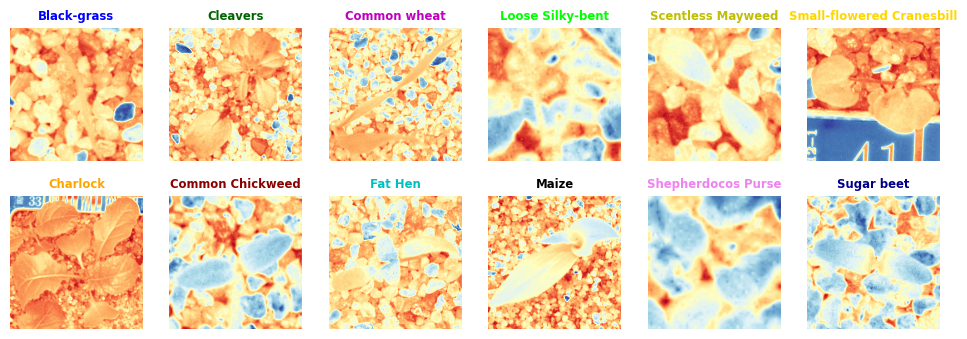

In [14]:
"""
Section de visualisation sur le canal 1.
à Savoir que, pour une bonne représentation des coleurs toutes les images ont 3 canaux (RGB2-LAB)
"""
# choisir l'unique valeur pour toutes les plantes 
index           = 10
# choisir le canal de couleur
channel         = 1
# visualisation des images
plot_img(data=data, index=index, channel=channel, colors=colors, legend=legend, type_img="images")


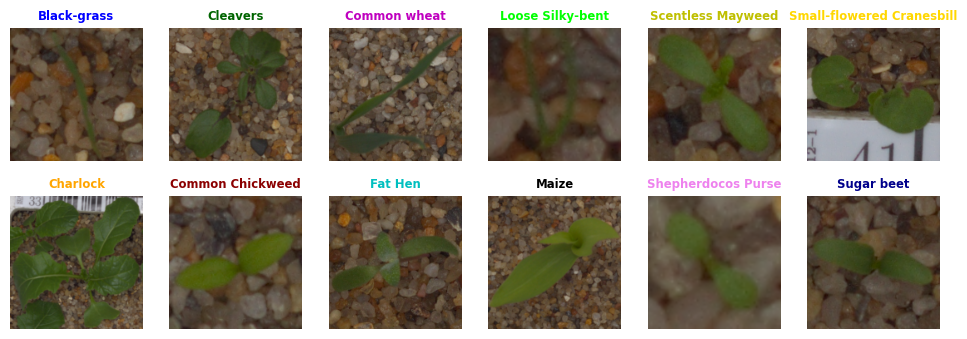

In [ ]:
idd = 0
fig, axes = plt.subplots(2, 6, figsize=(12, 4))
for j in range(6):
    for i in range(2):
        X = data['images'][idd]
        # conversion dtype(object) ---> dtype(float32)
        XX = X[index]#.astype("float")
        # création de figures avec imshow
        axes[i, j].imshow(XX)
        # difinir un titre pour chaque plantes 
        axes[i, j].set_title(legend[idd], fontsize='small', color=colors[idd], weight="bold")
        # x_axis and y_axis off
        axes[i, j].axis("off")
        # incrémentation 
        idd += 1
plt.show()